# Abstract

The project was conducted on the German Credit Data with the purpose of exploring,
processing and ultimately developing a machine learning model for predicting the Risk
assessment for a given applicant. The dataset was explored to point out useful relationships
between variables for future preprocessing steps, starting from the missing value treatment
evaluations. Preparing both the categorical and numerical variables for the Machine Learning
algorithms; missing values were imputed, numerical variables were Log-Scaled, Standardized
and Clustered while categorical variables were One-Hot Encoded.


In the Machine Learning phase of the project for the preprocessed dataset; K-Nearest Neighbors
(KNN), Decision Trees (DT), Logistic Regression (LR), Multilayer Perceptrons (MLP) and
Support Vector Machines (SVM) models were implemented with hyper-parameter tuning via
cross validation and the accuracies of each trained model was compared. The Logistic
Regression (LR) model yielded the highest accuracy score of, exceeding other alternatives when
considering other metrics such as F1-Score, which are further discussed in the report.


In order to test the limit in which the accuracy of the Logistic Regression model can be
improved, Feature Engineering methods were implemented by further investigating correlations
between the variables. After feature extraction and selection trials, a Logistic Regression model
with only 
['Checking account_Unknown', 'Checking account_little', 'credit_per_duration', 'Saving accounts_little']
 variables were trained and tested, yielding a _79% accuracy score model_ as the
finest model developed during the project.

# Introduction

The task is to create a Machine Learning model that can predict the credit risk assessment for a
given application. Due to the binary nature of the prediction (good or bad), this is a Binary
Classification problem consisting of 3 numerical variables and 6 categorical variables, excluding
the target column. The need for combining these fundamentally different variables and exploring
hidden relationships between them, make all following steps equally crucial and relevant.

##### 1-) Exploratory Data Analysis

##### 2-) Data Preprocessing

##### 3-) Machine Learning (including Feature Engineering) 



# 1-) Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Seeds were used for reliable randomness / reproducability of the project
random.seed(42)

### Unprocessed form of the dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/german_credit/german_credit_data.csv')
df.head()

In [ ]:
df.info()

### Below are initial visualisations for gaining simple insights to the data for:




*   Gender Distribution
*   Risk Assessment Distribution
*   Credit Amount vs Gender
*   Numerical Distributions





In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for categorical variable 'Sex'
sns.countplot(x='Sex', data=df, palette="pink", ax=axes[0])
axes[0].set_title('Distribution of Sex')

# Plot for categorical variable 'Risk'
sns.countplot(x='Risk', data=df, palette="mako", ax=axes[1])
axes[1].set_title('Distribution of Risk')

plt.show()

In [ ]:
# 'Sex' vs 'Credit amount'
sns.boxplot(x='Sex', y='Credit amount', data=df, palette = "pink")
plt.show()


In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
plt.suptitle('Distributions')

sns.histplot(df['Credit amount'], bins=40, ax=ax[0])
sns.histplot(df['Duration'], bins=40, ax=ax[1])
sns.histplot(df['Age'], bins=40, ax=ax[2])

## Here all categorical variables (6 of them) are explored.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes with a grid layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Categorical Variables
categorical_vars = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Plot each categorical variable with respect to 'Risk' in the grid layout
for i, var in enumerate(categorical_vars):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index

    sns.countplot(x=var, hue="Risk", data=df, ax=axes[row, col], palette = "pink")
    axes[row, col].set_title(f'{var} vs Risk')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


## Following the categorical data, all numerical data (3 of them) are explored

In [ ]:
# Create a figure and axes with a grid layout
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Numerical Variables
numerical_vars = ['Age', 'Credit amount', 'Duration']

# Set the palette to "pink"
sns.set_palette("pink")

# Plot each numerical variable with respect to 'Risk' in the grid layout
for i, var in enumerate(numerical_vars):
    sns.boxplot(x='Risk', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs Risk')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


## The only two missing variables are explored here



---

Skewness on both variables (especially for "Saving acccount") should be noted.

---



In [ ]:
# Create a figure and axes with a grid layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Set the palette to "pink"
sns.set_palette("mako_r")

# Plot countplots for 'Saving accounts' and 'Checking account'
sns.countplot(x='Saving accounts', hue='Risk', data=df, ax=axes[0])
axes[0].set_title('Saving accounts vs Risk')

sns.countplot(x='Checking account', hue='Risk', data=df, ax=axes[1])
axes[1].set_title('Checking account vs Risk')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Same data for missing values, in numbers.

In [ ]:
# Statistical properties of 'Saving accounts'
saving_accounts_stats = df['Saving accounts'].describe()

# Statistical properties of 'Checking account'
checking_account_stats = df['Checking account'].describe()

# Display the statistical properties
print("Saving accounts:")
print(saving_accounts_stats)
print()

print("Checking account:")
print(checking_account_stats)


## Other categorical variables with unique properties are explored.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a stacked bar chart for 'Purpose' vs 'Risk'
plt.figure(figsize=(10, 6))
sns.countplot(x='Purpose', hue='Risk', data=df)
plt.title('Purpose vs Risk')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Risk', loc='upper right')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grouped bar chart for 'Housing' vs 'Risk'
plt.figure(figsize=(8, 6))
sns.countplot(x='Housing', hue='Risk', data=df)
plt.title('Housing vs Risk')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.legend(title='Risk', loc='upper right')
plt.show()


## The heatmap shows correlations between variables before preprocessing where:

Duration & Credit amount is the only correlation > 0.50

In [ ]:
# Heatmap to show correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


# 2-) Data Preprocessing

## Before implementing Machine Learning models:



1.   Missing values should be treated
2.   Categorical values should be encoded where necessary



## 2.1-) Missing Value Treatment

As shown below:

*   Saving accounts
*   Checking account

variables have 20% and 40% missing data in their columns, respectively.


---

This can be adressed by mode imputation (due to the categorical nature of data), constant imputation or a ML Imputation with cross-validation such as k-NN Imputation.

The most successful method is investigated below.

In [ ]:
print(df['Saving accounts'].value_counts())
print(df['Checking account'].value_counts())

In [ ]:
df.info()

Option 1, Framework for:

Imputation with a constant value or a new category

In [ ]:
#Imputation with a constant value or a new category

# Assuming df is your DataFrame
df_constant = pd.read_csv('/content/drive/My Drive/german_credit/german_credit_data.csv')

# Filling NaN values with 'Unknown'
df_constant['Saving accounts'].fillna('Unknown', inplace=True)
df_constant['Checking account'].fillna('Unknown', inplace=True)

Option 2, Framework for:

Imputation with Mode

In [ ]:
# Filling NaN values with the mode (most frequent category)

df_mode = pd.read_csv('/content/drive/My Drive/german_credit/german_credit_data.csv')


df_mode['Saving accounts'].fillna(df_mode['Saving accounts'].mode()[0], inplace=True)
df_mode['Checking account'].fillna(df_mode['Checking account'].mode()[0], inplace=True)


Option 3, Framework for:

Imputation with k-NN Model

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

# Creating an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Selecting categorical columns to be encoded
cat_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

# Copying the dataframe to avoid changing the original one
df_encoded = df.copy()

# Encoding the categorical columns
df_encoded[cat_cols] = encoder.fit_transform(df[cat_cols])

# Creating an instance of the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Applying the imputer
df_encoded = pd.DataFrame(imputer.fit_transform(df_encoded), columns = df.columns)

# Decoding the categorical columns back to their original form
df_encoded[cat_cols] = encoder.inverse_transform(df_encoded[cat_cols])


Although this is not reflected in the process, the case for MCAR (Missing Completely At Random) was checked:

The low correlation between the two missing data points suggest such case, but since the statistical significance is not explored, we leave the finding as is.

In [ ]:
# Creating a dataframe indicating whether values are missing
missing_df = df.isnull()

# Calculating the correlation between missingness of different columns
corr = missing_df.corr()

print(corr)

## Trial of all 3 imputation options and their accuracy reports are found below.

Since the ***constant imputer*** yielded the highest accuracy score, both missing data points have been imputed with "Unknown".

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Assuming df is your DataFrame and 'Risk' is the target variable
df_t = pd.read_csv('/content/drive/My Drive/german_credit/german_credit_data.csv')
df_t['Risk'] = df_t['Risk'].apply(lambda x: 1 if x=='good' else 0)

# List of imputers
imputers = {
    'constant': SimpleImputer(strategy='constant', fill_value='Unknown'),
    'mode': SimpleImputer(strategy='most_frequent'),
    'knn': KNNImputer(n_neighbors=5)
}

# Initialize encoder
encoder = OrdinalEncoder()

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_t.drop('Risk', axis=1), df_t['Risk'], 
                                                    test_size=0.2, random_state=42)

# Iterating over imputers
for name, imputer in imputers.items():
    # Copy the train and test sets
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()

    # Apply encoding for knn imputer
    if name == 'knn':
        X_train_imputed[['Saving accounts', 'Checking account']] = encoder.fit_transform(X_train_imputed[['Saving accounts', 'Checking account']])
        X_test_imputed[['Saving accounts', 'Checking account']] = encoder.transform(X_test_imputed[['Saving accounts', 'Checking account']])
        
    # Perform imputation
    X_train_imputed[['Saving accounts', 'Checking account']] = imputer.fit_transform(X_train_imputed[['Saving accounts', 'Checking account']])
    X_test_imputed[['Saving accounts', 'Checking account']] = imputer.transform(X_test_imputed[['Saving accounts', 'Checking account']])

    # If knn, inverse transform after imputation
    if name == 'knn':
        X_train_imputed[['Saving accounts', 'Checking account']] = encoder.inverse_transform(X_train_imputed[['Saving accounts', 'Checking account']])
        X_test_imputed[['Saving accounts', 'Checking account']] = encoder.inverse_transform(X_test_imputed[['Saving accounts', 'Checking account']])
    
    # One-hot encoding for the categorical features
    X_train_imputed = pd.get_dummies(X_train_imputed)
    X_test_imputed = pd.get_dummies(X_test_imputed)

    # Training the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_imputed, y_train)

    # Predicting the test set results and calculating the accuracy
    y_pred = model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Imputer: {name}, Accuracy: {accuracy}')


### *df_constant* after the missing value treatment

In [ ]:
df_constant.head()

## 2.2-) Further Data Preprocessing


### As shown in the data exploration part, the numerical values are different in their scales from each other and log-scaling can help in this case.

Log-Scaling of the numerical columns:

In [ ]:
# List of numerical columns to be log transformed
numerical_columns = ['Age', 'Credit amount', 'Duration']

# Apply log(1 + x) transformation to all numerical columns
for col in numerical_columns:
    df_constant[col] = np.log1p(df_constant[col])

# Print the new DataFrame to verify
df_constant.head()

### In order to make the categorical variables suitable for all Machine Learning Models, we'll use One-hot Encoding.

This method is suitable since there are small numbers of possible values for all categorical variables.

In [ ]:
# List of categorical columns to be one-hot encoded
categorical_columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_constant, columns=categorical_columns)

# Print the new DataFrame to verify
df_encoded.head()

#### Below are the log-scaled numerical columns.

In [ ]:
# List of numerical columns
numerical_columns = ['Age', 'Credit amount', 'Duration']

# Number of columns for the subplot grid
num_cols = 3

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=num_cols, figsize=(18, 6))

# Draw a histogram and KDE for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df_encoded[col], kde=True, color="#729da3", ax=axs[i])
    axs[i].set_title(col)

# Display the figure with subplots
plt.tight_layout()
plt.show()

### To further eliminate the difference in numerical scales of "Initially numerical columns", Standardization will be applied as well.

In [ ]:
df_excluded = df_encoded.iloc[:, 1:]

In [ ]:
df_excluded.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the DataFrame
df_encoded_copy = df_excluded.copy()

# List of numerical columns
numerical_columns = ['Age', 'Credit amount', 'Duration']

# Create a scaler object
scaler = StandardScaler()

# Apply the scaler only to the numerical columns of the DataFrame copy
df_encoded_copy[numerical_columns] = scaler.fit_transform(df_encoded_copy[numerical_columns])

# Print the new DataFrame to verify
print(df_encoded_copy.head())


#### Finally, clustering by numerical data can help train our Machine Learning models as well.

Below, we search a plausible k hyperparameter for k-means clustering method, via Elbow Method.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract only the numerical columns for k-means clustering
numerical_data = df_encoded_copy[numerical_columns]

# Calculate sum of squared distances
ssd = []
K = range(1,10)  # Check for up to 10 clusters
for k in K:
    km = KMeans(n_clusters=k, n_init = 10)
    km = km.fit(numerical_data)
    ssd.append(km.inertia_)  # Sum of squared distances

# Plot sum of squared distances / Inertia
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


#### By the graph, k = 3 has been chosen as a good candidate, also considering the dimensionality of the columns.

In [ ]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 3

# Create a k-means object and fit it to the numerical data
km = KMeans(n_clusters=n_clusters, random_state=0, n_init = 10)
clusters = km.fit_predict(df_encoded_copy[numerical_columns])


### This 3D graph of clusters show a successful and possibly insightful selection of data points to the clusters.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a new figure
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for each data point
colors = ['#b182b8', '#93b8bd', '#ccc685']

# Plot each cluster with specific colors
for i in range(n_clusters):
    ax.scatter(df_encoded_copy.loc[clusters == i, 'Age'],
               df_encoded_copy.loc[clusters == i, 'Credit amount'],
               df_encoded_copy.loc[clusters == i, 'Duration'],
               c=colors[i])  # Assign specific color to each cluster

plt.show()


Despite the failure of clustering for Duration & Credit Amount pairs;

Age & Credit Amount and Age & Duration pairs yielded visually distinct clusters.

*This shows the success of clustering via Age.*

In [ ]:
import seaborn as sns

fig, ax  = plt.subplots(1,3,figsize=(20,5))

sns.scatterplot(x='Duration', y='Credit amount', hue=clusters, data=df_encoded_copy, ax=ax[0], palette='mako')
sns.scatterplot(x='Age', y='Credit amount', hue=clusters, data=df_encoded_copy, ax=ax[1], palette='mako')
sns.scatterplot(x='Age', y='Duration', hue=clusters, data=df_encoded_copy, ax=ax[2], palette='mako')

plt.show()


Finally the cluster data is added and preprocessing has been completed.

In [ ]:
# the cluster labels as a new column to thhe DataFrame
df_encoded_copy['cluster'] = clusters

In [ ]:
df_encoded_copy.groupby('cluster')[numerical_columns].mean()

The success of clustering by age (reverted back to original un-preprocessed form) is present below.

In [ ]:
# Add the cluster labels to your original DataFrame
df['cluster'] = clusters

# Perform groupby operation on the original DataFrame
df.groupby('cluster')[numerical_columns].mean()

# 3-) Machine Learning

### For reference, the current form of the preprocessed dataframe is:

In [ ]:
df_final = df_encoded_copy.copy()

In [ ]:
df_final.info()

In [ ]:
df_final.head()

Further on:


---


• K-Nearest Neighbors (KNN)

• Decision Trees (DT)

• Logistic Regression (LR)

• Multilayer Perceptrons (MLP)

• Support Vector Machines (SVM)


---


Machine Learning models will be implemented for the dataset and their accuracy for predicting will be evaluated, resulting in the selection of the optimal model.

## • K-Nearest Neighbors (KNN)

k-NN was implemented with hyperparameter tuning for the k values.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X = df_final.drop(['Risk_good', 'Risk_bad'], axis=1)  # drop the target variable and the 'Risk_bad' column
y = df_final['Risk_good']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier()

parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],  # Example values, you can choose others
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 is manhattan_distance and 2 is euclidean_distance
}

In [ ]:
grid_search = GridSearchCV(estimator=knn, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)


In [ ]:
best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

## • Decision Trees (DT)

Decision Trees were also implemented with cross validation for split values & max_depth limitation.

In [ ]:
# Import the required packages
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the features and the target
X = df_final.drop(columns=['Risk_good', 'Risk_bad'])
y = df_final['Risk_good']

In [ ]:
# Split the dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [ ]:
# Instantiate the classifier
dtree = DecisionTreeClassifier(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

In [ ]:
# Train the final model with the best parameters
final_model = DecisionTreeClassifier(**best_params)
final_model.fit(X_train, y_train)

In [ ]:
# Predict the labels of the test set
y_pred = final_model.predict(X_test)

# Print the accuracy score and classification report
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

## • Logistic Regression (LR)

Cross validation for logistic regression was also carried out before training the model.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['Risk_good', 'Risk_bad'], axis=1) # Drop both 'Risk' columns
y = df_final['Risk_good'] # Assuming 'Risk_good' is the target variable

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# setup the hyperparameter grid
param_grid = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.5], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['none'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
]

# instantiate the logistic regression model
logreg = LogisticRegression()

# instantiate the grid search model
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print("Best Parameters: ", grid_search.best_params_)

In [ ]:
# instantiate the logistic regression model with best parameters
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'], solver=grid_search.best_params_['solver'])

# fit the model with the training data
best_logreg.fit(X_train, y_train)

# make predictions on the test data
y_pred = best_logreg.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

## • Multilayer Perceptrons (MLP)

Cross validation was also carried out for the MLP model before training.

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


In [ ]:
X = df_final.drop(['Risk_good', 'Risk_bad'], axis=1) # Drop both 'Risk' columns
y = df_final['Risk_good'] # Assuming 'Risk_good' is the target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mlp = MLPClassifier(max_iter=1000)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
}

In [ ]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

In [ ]:
final_mlp = MLPClassifier(max_iter=1000, **clf.best_params_)
final_mlp.fit(X, y)

y_pred = final_mlp.predict(X_test)
print(classification_report(y_test, y_pred))


## • Support Vector Machines (SVM)

Finally, the cross-validation was also done before training the SVM model with the dataset.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report

# split data into features and target
X = df_final.drop(['Risk_good', 'Risk_bad'], axis=1)  # remove the target columns
y = df_final['Risk_bad']  # select one of the target columns, depending on the problem 

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the model
svc = svm.SVC()

# define the parameters for grid search
parameters = {'kernel': ('linear', 'rbf', 'poly'), 'C':[0.1, 1, 10], 'gamma':[1, 0.1, 0.01]}

# instantiate the grid search with 5-fold cross-validation
clf = GridSearchCV(svc, parameters, cv=5)

# fit the model to the training data
clf.fit(X_train, y_train)

# print the best hyperparameters
print("Best Parameters:\n", clf.best_params_)

# predict the test set results
y_pred = clf.predict(X_test)

# print the performance metrics
print(classification_report(y_test, y_pred))

# Interpretation of the Machine Learning Models (before Feature Engineering)


Upon analyzing the performance metrics from the implementation of the machine learning models on the dataset, it is observable that the Logistic Regression model demonstrates the best performance, as gauged by accuracy, precision, recall, and F1-score metrics. The accuracy of Logistic Regression registers at 0.765, which is higher compared to the Decision Tree model (0.645), k-Nearest Neighbors (0.755), Multilayer Perceptron (0.77), and Support Vector Machine model (0.76). Furthermore, the Logistic Regression model exhibits a remarkable weighted average precision, recall, and F1-score, all of which exceed their counterparts in the other models.


---




However, it is notable that the k-Nearest Neighbors, Multilayer Perceptron, and Support Vector Machine models also show comparable performances, with accuracy scores exceeding 0.75. Nevertheless, these models still fall short in comparison to the Logistic Regression model in terms of precision, recall, and F1-score. In stark contrast, the Decision Tree model notably underperforms, with an accuracy of 0.645, which is significantly lower than the other models.


---



It should also be noted that, despite having a higher accuracy score of 0.77, MLP falls short in terms of other metrics such as Precision, Recall and F1-Score.

#### Performance of Logistic Regression, the best model before Feature Engineering:

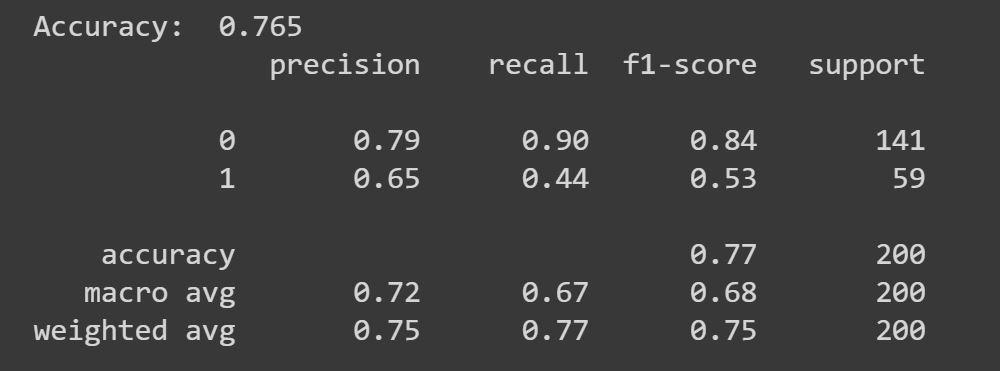

# Feature Engineering

#### After observing the Logistic Regression Model as the best model in terms of its performance by accuracy, precision, recall, and F1-score metrics, some feature engineering methods are performed to further improve the performance of the Logistic Regression Model.

First, a new column, credit_per_duration is created to further improve the results of the logistic regression model. 

In [ ]:
df_final['credit_per_duration'] = df_excluded['Credit amount'] / df_excluded['Duration']

scaler = StandardScaler()

# Apply the scaler to the new column for consistency
df_final['credit_per_duration'] = scaler.fit_transform(df_final[['credit_per_duration']])

Then, the importance of each feature is calculated using correlation analysis.

In [ ]:
correlation_matrix = df_final.corr()

# Calculate the correlation with the target variable
target_correlation = correlation_matrix['Risk_good'].abs().sort_values(ascending=False)

# Print the correlation values
print(target_correlation)

Three different models are trained and tested using the most important features, and then compared by their performance.

In [ ]:
param_grid = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.5], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['none'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
]

# instantiate the logistic regression model
logreg = LogisticRegression()

# instantiate the grid search model
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print("Best Parameters: ", grid_search.best_params_)

In [ ]:
selected_columns = ['Risk_good', 'Risk_bad', 'Checking account_Unknown', 'Checking account_little', 'Duration']

# Create a new DataFrame with the selected columns
new_df = df_final[selected_columns].copy()
X = new_df.drop(['Risk_good', 'Risk_bad'], axis=1) # Drop both 'Risk' columns
y = new_df['Risk_good'] # Assuming 'Risk_good' is the target variable

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'], solver=grid_search.best_params_['solver'])

# fit the model with the training data
best_logreg.fit(X_train, y_train)

# make predictions on the test data
y_pred = best_logreg.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
selected_columns = ['Risk_good', 'Risk_bad', 'Checking account_Unknown', 'Checking account_little', 'credit_per_duration']

# Create a new DataFrame with the selected columns
new_df = df_final[selected_columns].copy()
X = new_df.drop(['Risk_good', 'Risk_bad'], axis=1) # Drop both 'Risk' columns
y = new_df['Risk_good'] # Assuming 'Risk_good' is the target variable

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'], solver=grid_search.best_params_['solver'])

# fit the model with the training data
best_logreg.fit(X_train, y_train)

# make predictions on the test data
y_pred = best_logreg.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
selected_columns = ['Risk_good', 'Risk_bad', 'Checking account_Unknown', 'Checking account_little', 'credit_per_duration', 'Saving accounts_little']

# Create a new DataFrame with the selected columns
new_df = df_final[selected_columns].copy()
X = new_df.drop(['Risk_good', 'Risk_bad'], axis=1) # Drop both 'Risk' columns
y = new_df['Risk_good'] # Assuming 'Risk_good' is the target variable

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'], solver=grid_search.best_params_['solver'])

# fit the model with the training data
best_logreg.fit(X_train, y_train)

# make predictions on the test data
y_pred = best_logreg.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Conclusion

In conclusion, the experiments conducted to predict credit risk as "good" or "bad" yielded promising results. Different approaches and techniques were employed to enhance the predictive accuracy of the models, resulting in key findings that aligned with our initial expectations while also providing some surprising discoveries.

The project involved training five machine learning models, namely KNN, Decision Tree, Logistic Regression, Multilayer Perceptron, and Support Vector Machine. Among these models, Logistic Regression emerged as the top performer, surpassing the others with an accuracy of 0.77. This outcome was consistent with our intuition, as Logistic Regression is widely known for its effectiveness in binary classification tasks.

To further improve the Logistic Regression model, three logistic regression models were trained after feature extraction and selection. Surprisingly, the third logistic regression model using only the features 


---


['Checking account_Unknown', 'Checking account_little', 'credit_per_duration', 'Saving accounts_little'] 


---
outperformed all other models, achieving an accuracy of 0.79. This finding was unexpected because of how counter intuitive it is to use less information in training but served as an exciting revelation, suggesting that careful feature selection can significantly enhance model performance. These outcomes contribute to the existing body of knowledge in credit risk assessment and emphasize the importance of thoughtful model selection and feature engineering.


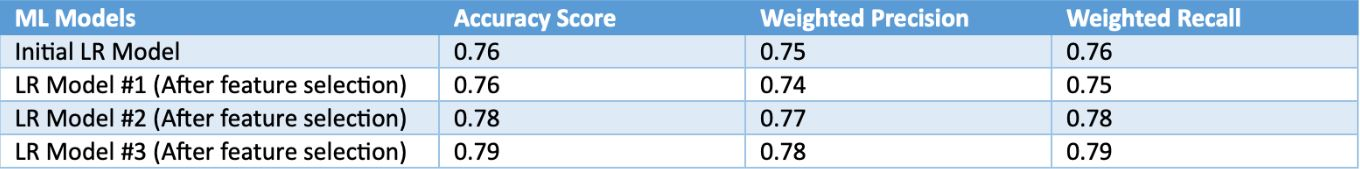